In [1]:
pip install xgboost optuna scikit-learn matplotlib seaborn numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print(os.getcwd())

D:\ML\Diabetes_predictor\PIMA


In [3]:
import os
print(os.getcwd())
for dirname, _, filenames in os.walk('D:/ML/Diabetes_predictor/PIMA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\ML\Diabetes_predictor\PIMA
D:/ML/Diabetes_predictor/PIMA\app.py
D:/ML/Diabetes_predictor/PIMA\diabetes-predictor (1)-Copy1.ipynb
D:/ML/Diabetes_predictor/PIMA\diabetes-predictor (1).ipynb
D:/ML/Diabetes_predictor/PIMA\diabetes.csv
D:/ML/Diabetes_predictor/PIMA\model.pkl
D:/ML/Diabetes_predictor/PIMA\.ipynb_checkpoints\diabetes-checkpoint.csv
D:/ML/Diabetes_predictor/PIMA\.ipynb_checkpoints\diabetes-predictor (1)-checkpoint.ipynb
D:/ML/Diabetes_predictor/PIMA\.ipynb_checkpoints\diabetes-predictor (1)-Copy1-checkpoint.ipynb


In [4]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**It shows zero because there is no empty data**
But in medical terms '0' is impossible it would be considered as NULL
-

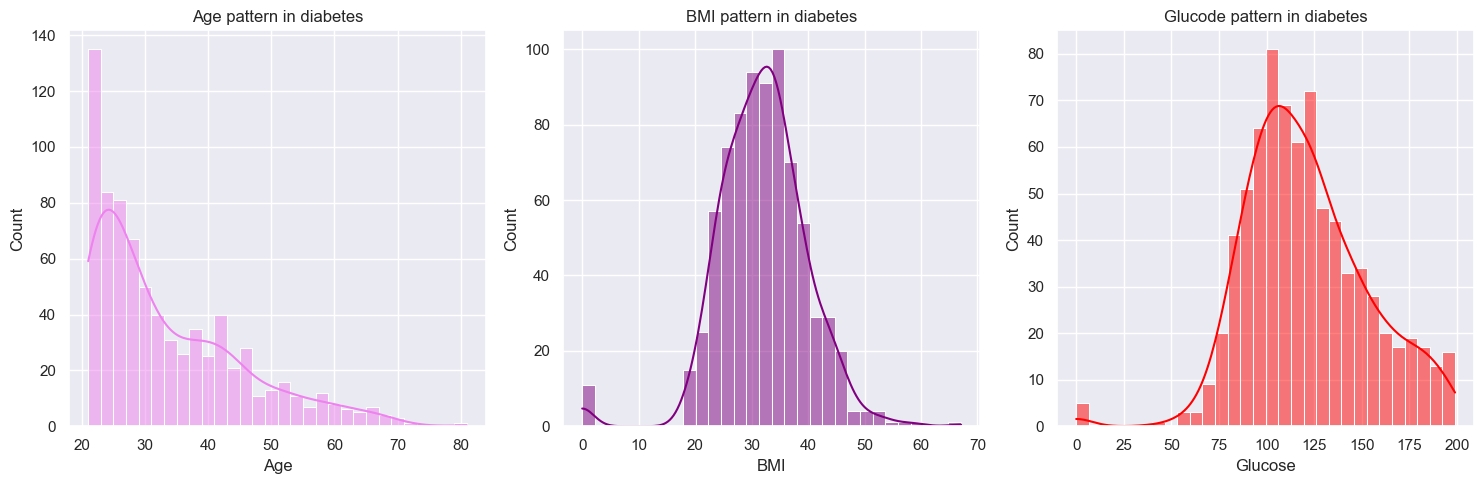

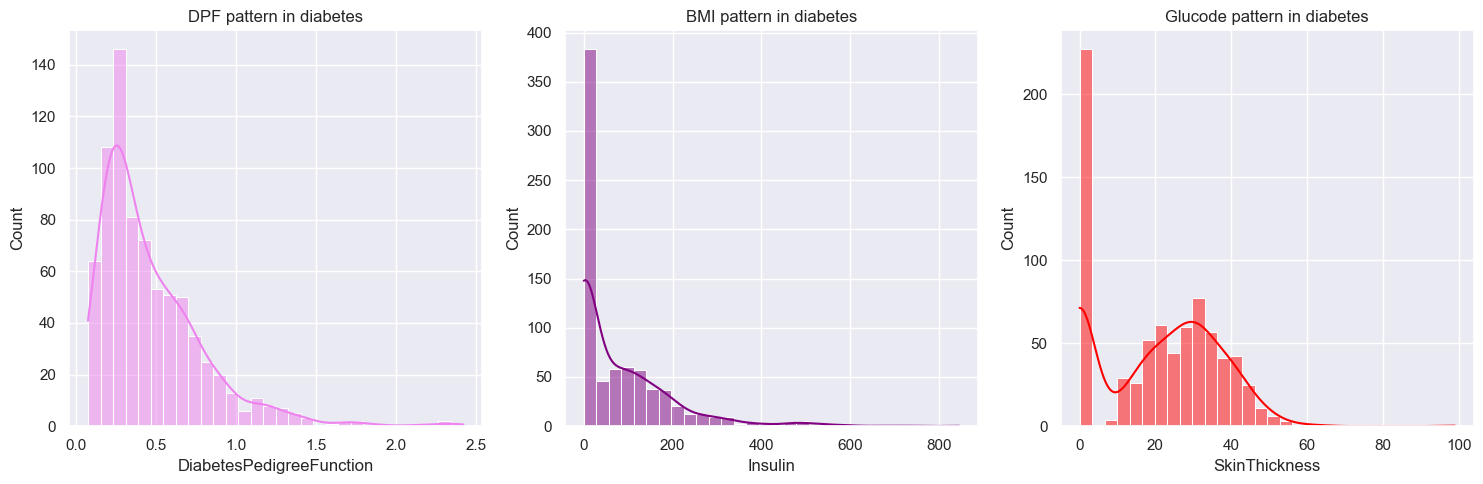

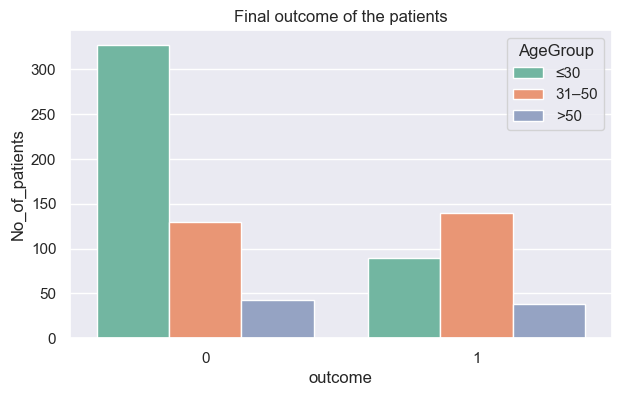

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=30,kde=True,color='violet')
plt.title('Age pattern in diabetes')

plt.subplot(1,3,2)
sns.histplot(df['BMI'], bins=30, kde=True,color='purple')
plt.title('BMI pattern in diabetes')

plt.subplot(1,3,3)
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Glucode pattern in diabetes')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['DiabetesPedigreeFunction'], bins=30,kde=True,color='violet')
plt.title('DPF pattern in diabetes')

plt.subplot(1,3,2)
sns.histplot(df['Insulin'], bins=30, kde=True,color='purple')
plt.title('BMI pattern in diabetes')

plt.subplot(1,3,3)
sns.histplot(df['SkinThickness'], bins=30, kde=True, color='red')
plt.title('Glucode pattern in diabetes')

plt.tight_layout()
plt.show()
plt.figure(figsize=(7,4))
# hue=None, palette="Set2",Legend=False
# sns.countplot(x='Outcome' ,data=df,color='pink')
# make an age group for demo
df['AgeGroup'] = pd.cut(df['Age'], [0,30,50,100], labels=['≤30','31–50','>50'])
sns.countplot(x='Outcome', hue='AgeGroup', data=df, palette='Set2')  # legend shows AgeGroup colors

plt.title('Final outcome of the patients')
plt.xlabel('outcome')
plt.ylabel('No_of_patients')
plt.show()

To check the NULL percentage of the dataset
-

In [10]:
z_p=df.apply(lambda x:(x==0).sum()/len(x)*100)
print(z_p)

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
AgeGroup                     0.000000
dtype: float64


By analysis of NULL('0) we DROP the insulin column as it have 48% of data as NULL
-


In [11]:
df.drop(columns=['Insulin'],inplace=True)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,33.6,0.627,50,1,31–50
1,1,85,66,29,26.6,0.351,31,0,31–50
2,8,183,64,0,23.3,0.672,32,1,31–50
3,1,89,66,23,28.1,0.167,21,0,≤30
4,0,137,40,35,43.1,2.288,33,1,31–50


For NULL % fall between < 5% we goes to replace it with median (CAPPING)
-

In [13]:
cap_col=['BloodPressure','BMI']
df[cap_col]=df[cap_col].apply(lambda x: x.replace(0,x.median()))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,33.6,0.627,50,1,31–50
1,1,85,66,29,26.6,0.351,31,0,31–50
2,8,183,64,0,23.3,0.672,32,1,31–50
3,1,89,66,23,28.1,0.167,21,0,≤30
4,0,137,40,35,43.1,2.288,33,1,31–50


For pregnancies col we can't change the NULL data because SOME WOMEN DON'T HAVE PREGNANCIES
-
FOR previous cases we changed because medically that are impossible ,SO WE HAVE CHANGED TO BE USEFUL FOR PREDICTION
-

**For skin thickness we gonna refer histogram to check how it was skewed or symmetric or noisy.**

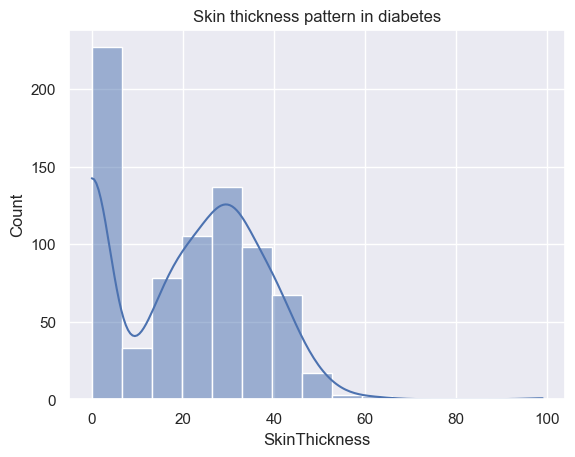

23.0
20.536458333333332
0.10937249648187608
-0.520071866153013


In [14]:
sns.histplot(df['SkinThickness'],kde=True)
plt.title('Skin thickness pattern in diabetes')
plt.show()
print(df['SkinThickness'].median())
print(df['SkinThickness'].mean())
print(df['SkinThickness'].skew())
print(df['SkinThickness'].kurtosis())

So now we got skew()=0.109..... so this mean it is normally distributed so applying mean to NULL -------instead of this KNN imputer is best as it see neighbouring pattern
-

In [15]:
import numpy as np
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35.0,33.6,0.627,50,1,31–50
1,1,85,66,29.0,26.6,0.351,31,0,31–50
2,8,183,64,NaN,23.3,0.672,32,1,31–50
3,1,89,66,23.0,28.1,0.167,21,0,≤30
4,0,137,40,35.0,43.1,2.288,33,1,31–50


Checking for outliers using BOXPLOT
-

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca507d5d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca507d5f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca507d5bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca507d6210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca507d6350>],
 'means': []}

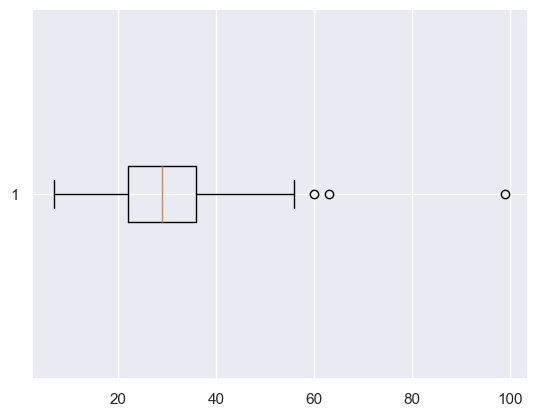

In [16]:
plt.boxplot(df['SkinThickness'].dropna(),vert=False)

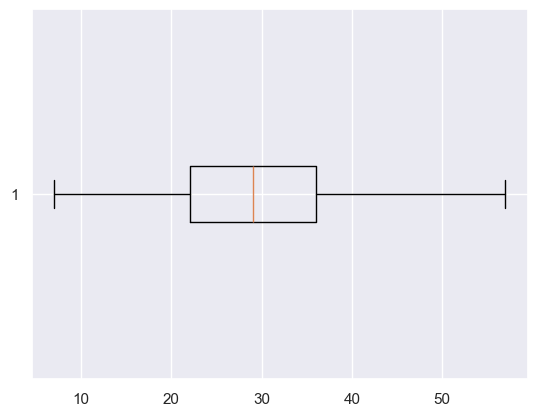

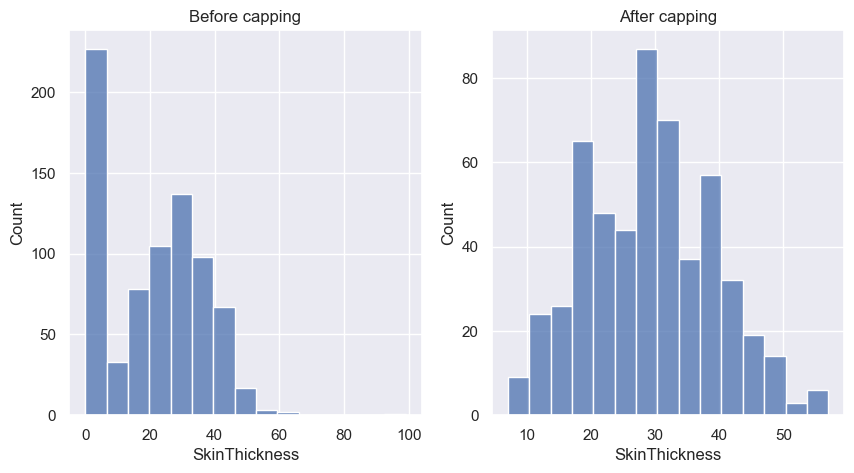

In [17]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3-Q1
lb = Q1-1.5*IQR#lower bound
ub = Q3+1.5*IQR#upper bound

df2=pd.read_csv('diabetes.csv')

df['SkinThickness'] = df['SkinThickness'].clip(lower=lb,upper=ub)

plt.boxplot(df['SkinThickness'].dropna(),vert=False)

fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df2['SkinThickness'],ax=axs[0])
axs[0].set_title('Before capping')
sns.histplot(df['SkinThickness'],ax=axs[1])
axs[1].set_title('After capping')

plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,31–50
1,1,85.0,66.0,29.0,26.6,0.351,31.0,0,31–50
2,8,183.0,64.0,23.4,23.3,0.672,32.0,1,31–50
3,1,89.0,66.0,23.0,28.1,0.167,21.0,0,≤30
4,0,137.0,40.0,35.0,43.1,2.288,33.0,1,31–50
5,5,116.0,74.0,20.2,25.6,0.201,30.0,0,≤30
6,3,78.0,50.0,32.0,31.0,0.248,26.0,1,≤30
7,10,115.0,72.0,28.2,35.3,0.134,29.0,0,≤30
8,2,197.0,70.0,45.0,30.5,0.158,53.0,1,>50
9,8,125.0,96.0,25.2,32.0,0.232,54.0,1,>50


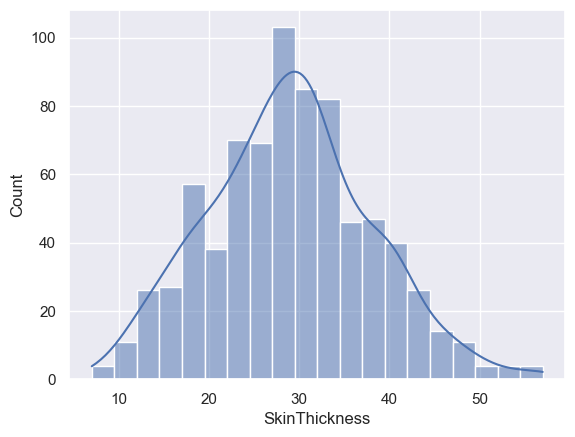

In [18]:
from sklearn.impute import KNNImputer

helper_cols = ['BMI','Glucose','Age','BloodPressure']
impute_col = ['SkinThickness'] + helper_cols
 
imputer = KNNImputer(n_neighbors=5)
df[impute_col]=imputer.fit_transform(df[impute_col])
sns.histplot(df['SkinThickness'],kde=True)
df.head(10)

In [19]:
print(df['SkinThickness'].skew())
print(df['SkinThickness'].kurtosis())

0.19400746443489675
-0.061930596899018475


data cleaning done!!!!


FEATURE ENGINEERING
-

In [20]:
df=df.drop('AgeGroup',axis=1)
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1


In [21]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
print("X (features):")
display(x.head(1))

print("\nY (target):")
display(y.head(1))

print(df['Age'].min())

X (features):


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,33.6,0.627,50.0



Y (target):


0    1
Name: Outcome, dtype: int64

21.0


AGE GROUPING
-

In [22]:
df['AgeGroup']=pd.cut(df['Age'],
                      bins=[20,30,40,50,60,100],
                      labels=['20-30','30-40','40-50','50-60','60-100'])
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,40-50


BMI CATEGORIES
-

In [23]:
df['BMI_category']=pd.cut(df['BMI'],
                 bins=[0,18.5,25,30,100],
                 labels=['Underweight','Normal','Overweight','Obese'])
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_category
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,40-50,Obese


GLUCOSE LEVEL
-

In [24]:
df['Glucose_lvl']=pd.cut(df['Glucose'],
                         bins=[0,100,125,200,300],
                         labels=['Normal','Prediabetes','Diabetes','Severe'])
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_category,Glucose_lvl
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,40-50,Obese,Diabetes


NO OF PREGNANCIES
-

In [25]:
df['had_preg']=pd.cut(df['Pregnancies'],
                      bins=[-1,0,3,20],
                      labels=['0','1-3','4+'])
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_category,Glucose_lvl,had_preg
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,40-50,Obese,Diabetes,4+


INTERACTION FEATURES
-

In [26]:
df['BMI_Age']=df['BMI'] * df['Age']
df['Metabolism_effi']=df['Glucose']/df['BMI']+1e-5
df['fat_distribution']=df['SkinThickness'] * df['BMI']
df['Preg_rel_risk'] = df['Pregnancies'] * df['Age']
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_category,Glucose_lvl,had_preg,BMI_Age,Metabolism_effi,fat_distribution,Preg_rel_risk
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,40-50,Obese,Diabetes,4+,1680.0,4.404772,1176.0,300.0


In [27]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup',
       'BMI_category', 'Glucose_lvl', 'had_preg', 'BMI_Age', 'Metabolism_effi',
       'fat_distribution', 'Preg_rel_risk'],
      dtype='object')


Changing into numerical values for featured columns
-

In [28]:
df = pd.get_dummies(df, columns=['AgeGroup','had_preg','BMI_category','Glucose_lvl'], drop_first=True)
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age,Metabolism_effi,...,AgeGroup_50-60,AgeGroup_60-100,had_preg_1-3,had_preg_4+,BMI_category_Normal,BMI_category_Overweight,BMI_category_Obese,Glucose_lvl_Prediabetes,Glucose_lvl_Diabetes,Glucose_lvl_Severe
0,6,148.0,72.0,35.0,33.6,0.627,50.0,1,1680.0,4.404772,...,False,False,False,True,False,False,True,False,True,False


TRAIN TEST SPLIT (DATA)
-

In [29]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2, random_state = 42
)

SCALING (Z-SCORE SCALING)
-

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 LOGISTICS REGRESSION MODEL
 -

Quick Analogy
------
Precision → “When the doctor says you have diabetes, how often is the doctor correct?”
------
Recall → “Out of all people who really have diabetes, how many did the doctor find?”
------

precision (don’t call non-diabetics diabetic) and recall (catch as many true diabetics as possible).
-

Integrating the best hyper parameters and best threshold we can better recall in logistic regression
-

Why Hyperparameter Optimization (with class_weight etc.) is better here:
-
Your GridSearch-tuned model:

Recall (class 1) = 0.78 ✅ (catches more true positives)
-
Accuracy = 0.74 (a bit lower, but that’s fine in healthcare)
-
Your manual accuracy-oriented model (C=10):

Recall (class 1) = ~0.71 ❌ (misses more true positives)
-
Accuracy = 0.779 (higher, but at the cost of recall)
-

# LogisticRegression

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# 1. Train model with best parameters
best_model = LogisticRegression(
    C=1291.5496650148827,
    class_weight="balanced",
    max_iter=100,
    penalty="l2",
    solver="lbfgs"
)

best_model.fit(X_train_scaled, Y_train)

# 2. Get predicted probabilities
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # probs for class 1

# 3. Search best threshold (0.3–0.5 step=0.01, can extend if needed)
thresholds = np.arange(0.3, 0.51, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(Y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# 4. Final predictions with best threshold
y_pred_final = (y_probs >= best_thresh).astype(int)

# 5. Print results
print("Best Threshold:", best_thresh)
print("F1 Score:", best_f1)
print("Accuracy:", accuracy_score(Y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_final))


Best Threshold: 0.49000000000000016
F1 Score: 0.6935483870967742
Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79        99
           1       0.62      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154


Confusion Matrix:
 [[73 26]
 [12 43]]


**Diagnostics of LogisticRegression Model**

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# --- 1. Train the Model ---
model = LogisticRegression(
    C=1291.5496650148827,
    class_weight="balanced",
    max_iter=100,
    penalty="l2",
    solver="lbfgs"
)
model.fit(X_train_scaled, Y_train)

# --- 2. Threshold Tuning on Test Set ---
y_probs_test = model.predict_proba(X_test_scaled)[:, 1]
thresholds = np.arange(0.3, 0.51, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    preds = (y_probs_test >= t).astype(int)
    f1 = f1_score(Y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"\n🔍 Best Threshold: {best_thresh:.2f} | F1 Score (Test): {best_f1:.4f}")

# --- 3. Train vs Test Performance ---
y_probs_train = model.predict_proba(X_train_scaled)[:, 1]
y_pred_train = (y_probs_train >= best_thresh).astype(int)
y_pred_test = (y_probs_test >= best_thresh).astype(int)

print("\n📊 Train Performance")
print("F1 Score:", f1_score(Y_train, y_pred_train))
print("Accuracy:", accuracy_score(Y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(Y_train, y_pred_train))

print("\n📊 Test Performance")
print("F1 Score:", f1_score(Y_test, y_pred_test))
print("Accuracy:", accuracy_score(Y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_test))

# --- 4. Cross-Validation ---
cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='f1')
print("\n📈 Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1:", np.mean(cv_scores))

# --- 5. Noise Sensitivity Test ---
X_test_noisy = X_test_scaled + np.random.normal(0, 0.01, X_test_scaled.shape)
y_pred_noisy = (model.predict_proba(X_test_noisy)[:, 1] >= best_thresh).astype(int)
print("\n🧪 Noise Sensitivity")
print("F1 Score with noise:", f1_score(Y_test, y_pred_noisy))

# --- 6. Regularization Sweep ---
print("\n🔁 Regularization Sweep")
for c in [0.01, 0.1, 1, 10, 100, 1000]:
    m = LogisticRegression(C=c, class_weight="balanced", max_iter=100, penalty="l2", solver="lbfgs")
    m.fit(X_train_scaled, Y_train)
    probs = m.predict_proba(X_test_scaled)[:, 1]
    preds = (probs >= best_thresh).astype(int)
    print(f"C={c:<6} | F1 Score: {f1_score(Y_test, preds):.4f}")



🔍 Best Threshold: 0.49 | F1 Score (Test): 0.6935

📊 Train Performance
F1 Score: 0.7291666666666666
Accuracy: 0.7882736156351792
Confusion Matrix:
 [[309  92]
 [ 38 175]]

📊 Test Performance
F1 Score: 0.6935483870967742
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[73 26]
 [12 43]]

📈 Cross-Validation F1 Scores: [0.68085106 0.7311828  0.72727273 0.62222222 0.71578947]
Mean CV F1: 0.6954636565415744

🧪 Noise Sensitivity
F1 Score with noise: 0.6935483870967742

🔁 Regularization Sweep
C=0.01   | F1 Score: 0.6560
C=0.1    | F1 Score: 0.6829
C=1      | F1 Score: 0.6774
C=10     | F1 Score: 0.6880
C=100    | F1 Score: 0.6935
C=1000   | F1 Score: 0.6935


# LightGBM

*This will looks accuracy and all sort of scores with 95+ but this is overfitting*

In [33]:
!pip install lightgbm
!pip install optuna optuna-integration[lightgbm]


C:\Users\rishi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-09-14 09:15:17,391] A new study created in memory with name: no-name-bc0e7ac3-d4cc-4b28-8beb-6459e0144125
[I 2025-09-14 09:15:25,165] Trial 0 finished with value: 0.7022900714900064 and parameters: {'n_estimators': 317, 'learning_rate': 0.08209617376500357, 'num_leaves': 24, 'max_depth': 6, 'subsample': 0.9137743000107774, 'colsample_bytree': 0.964637993104116, 'reg_alpha': 0.26979428651675164, 'reg_lambda': 0.7719463240731904}. Best is trial 0 with value: 0.7022900714900064.
[I 2025-09-14 09:15:25,197] Trial 1 finished with value: 0.7058823479838995 and parameters: {'n_estimators': 105, 'learning_rate': 0.020031671420857322, 'num_leaves': 23, 'max_depth': 4, 'subsample': 0.730301698722329, 'colsample_byt

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-09-14 09:15:25,241] Trial 2 finished with value: 0.708661412434745 and parameters: {'n_estimators': 140, 'learning_rate': 0.025654606820798738, 'num_leaves': 13, 'max_depth': 7, 'subsample': 0.6265504205731814, 'colsample_bytree': 0.991043431299814, 'reg_alpha': 0.835243079452312, 'reg_lambda': 0.36712201743478656}. Best is trial 2 with value: 0.708661412434745.
[I 2025-09-14 09:15:25,331] Trial 3 finished with value: 0.7096774144380854 and parameters: {'n_estimators': 229, 'learning_rate': 0.04820830195339775, 'num_leaves': 45, 'max_depth': 9, 'subsample': 0.6234499829612707, 'colsample_bytree': 0.6930732305385483, 'reg_alpha': 0.09459237118534758, 'reg_lambda': 0.13598354571486482}. Best is trial 3 with value: 0.7096774144380854.
[I 2025-09-14 09:15:25,391] Trial 4 finished with value: 0.707692302835503 and parameters: {'n_estimators': 212, 'learning_rate': 0.058765746626631754, 'num_leaves': 27, 'max_depth': 5, 'subsample': 0.8348049496312506, 'colsample_bytree': 0.966682492

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:25,532] Trial 5 finished with value: 0.7142857093877552 and parameters: {'n_estimators': 426, 'learning_rate': 0.07229912279223676, 'num_leaves': 41, 'max_depth': 7, 'subsample': 0.7027246502197115, 'colsample_bytree': 0.8628036043398581, 'reg_alpha': 0.4937815165833689, 'reg_lambda': 0.70589496033983}. Best is trial 5 with value: 0.7142857093877552.
[I 2025-09-14 09:15:25,609] Trial 6 finished with value: 0.7118644018155703 and parameters: {'n_estimators': 214, 'learning_rate': 0.0352399770087256, 'num_leaves': 25, 'max_depth': 9, 'subsample': 0.6656311065241995, 'colsample_bytree': 0.6416718722160419, 'reg_alpha': 0.9356207471631317, 'reg_lambda': 0.9851144995982706}. Best is trial 5 with value: 0.7142857093877552.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-14 09:15:25,662] Trial 7 finished with value: 0.70399999509248 and parameters: {'n_estimators': 299, 'learning_rate': 0.05667904593231245, 'num_leaves': 40, 'max_depth': 3, 'subsample': 0.8017245857148616, 'colsample_bytree': 0.6278353902262244, 'reg_alpha': 0.5489006053080215, 'reg_lambda': 0.4503199340297541}. Best is trial 5 with value: 0.7142857093877552.
[I 2025-09-14 09:15:25,749] Trial 8 finished with value: 0.708661412434745 and parameters: {'n_estimators': 335, 'learning_rate': 0.0451333903509518, 'num_leaves': 13, 'max_depth': 8, 'subsample': 0.6120722757320792, 'colsample_bytree': 0.6156401697316267, 'reg_alpha': 0.6138232464605983, 'reg_lambda': 0.507321633389659}. Best is trial 5 with value: 0.7142857093877552.
[I 2025-09-14 09:15:25,781] Trial 9 finished with value: 0.7096774144380854 and parameters: {'n_estimators': 113, 'learning_rate': 0.055248138329008524, 'num_leaves': 22, 'max_depth': 4, 'subsample': 0.7820926175863063, 'colsample_bytree': 0.6824047116410

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

[I 2025-09-14 09:15:25,990] Trial 10 finished with value: 0.6776859454709379 and parameters: {'n_estimators': 484, 'learning_rate': 0.08965787733016384, 'num_leaves': 37, 'max_depth': 10, 'subsample': 0.9838777458806002, 'colsample_bytree': 0.848406560707305, 'reg_alpha': 0.03185969517136367, 'reg_lambda': 0.059608407936611985}. Best is trial 5 with value: 0.7142857093877552.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-14 09:15:26,118] Trial 11 finished with value: 0.70399999509248 and parameters: {'n_estimators': 495, 'learning_rate': 0.07477008737629852, 'num_leaves': 33, 'max_depth': 8, 'subsample': 0.6990979320120783, 'colsample_bytree': 0.8548900124647429, 'reg_alpha': 0.7025538009214963, 'reg_lambda': 0.9708021244055458}. Best is trial 5 with value: 0.7142857093877552.
[I 2025-09-14 09:15:26,279] Trial 12 finished with value: 0.6962962914962963 and parameters: {'n_estimators': 409, 'learning_rate': 0.02893200798116415, 'num_leaves': 49, 'max_depth': 10, 'subsample': 0.6987386772389622, 'colsample_bytree': 0.8190116606376527, 'reg_alpha': 0.40489064195050517, 'reg_lambda': 0.6600398825700016}. Best is trial 5 with value: 0.7142857093877552.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-09-14 09:15:26,395] Trial 13 finished with value: 0.70399999509248 and parameters: {'n_estimators': 408, 'learning_rate': 0.0717590144911269, 'num_leaves': 32, 'max_depth': 7, 'subsample': 0.6762229799358614, 'colsample_bytree': 0.8994084364921012, 'reg_alpha': 0.9786262205525609, 'reg_lambda': 0.9986687100102135}. Best is trial 5 with value: 0.7142857093877552.
[I 2025-09-14 09:15:26,479] Trial 14 finished with value: 0.6923076874508876 and parameters: {'n_estimators': 213, 'learning_rate': 0.09765318280007851, 'num_leaves': 41, 'max_depth': 8, 'subsample': 0.751287090229148, 'colsample_bytree': 0.7722612975373353, 'reg_alpha': 0.25472024682296673, 'reg_lambda': 0.8200321969279403}. Best is trial 5 with value: 0.7142857093877552.


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:26,654] Trial 15 finished with value: 0.6923076874508876 and parameters: {'n_estimators': 397, 'learning_rate': 0.037404937405246204, 'num_leaves': 18, 'max_depth': 9, 'subsample': 0.8500828028884502, 'colsample_bytree': 0.7205014254838835, 'reg_alpha': 0.7251518187694821, 'reg_lambda': 0.593839807387033}. Best is trial 5 with value: 0.7142857093877552.


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:26,742] Trial 16 finished with value: 0.7175572470625255 and parameters: {'n_estimators': 264, 'learning_rate': 0.014223584600921449, 'num_leaves': 36, 'max_depth': 6, 'subsample': 0.6646504332077928, 'colsample_bytree': 0.9067778794685222, 'reg_alpha': 0.5021094748401469, 'reg_lambda': 0.2792849977814386}. Best is trial 16 with value: 0.7175572470625255.
[I 2025-09-14 09:15:26,830] Trial 17 finished with value: 0.7175572470625255 and parameters: {'n_estimators': 269, 'learning_rate': 0.012749609330956925, 'num_leaves': 36, 'max_depth': 6, 'subsample': 0.7475770653657522, 'colsample_bytree': 0.915951264167199, 'reg_alpha': 0.4433981600503787, 'reg_lambda': 0.3182925376340815}. Best is trial 16 with value: 0.7175572470625255.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[I 2025-09-14 09:15:26,929] Trial 18 finished with value: 0.730158725260771 and parameters: {'n_estimators': 268, 'learning_rate': 0.011357009906399838, 'num_leaves': 37, 'max_depth': 6, 'subsample': 0.746186255322035, 'colsample_bytree': 0.9198899485810338, 'reg_alpha': 0.2594693572842307, 'reg_lambda': 0.2765351394519437}. Best is trial 18 with value: 0.730158725260771.
[I 2025-09-14 09:15:26,998] Trial 19 finished with value: 0.7333333283833334 and parameters: {'n_estimators': 172, 'learning_rate': 0.012853170834211137, 'num_leaves': 30, 'max_depth': 5, 'subsample': 0.8937911614476887, 'colsample_bytree': 0.9081212012219441, 'reg_alpha': 0.2658648017618922, 'reg_lambda': 0.2122698311750223}. Best is trial 19 with value: 0.7333333283833334.
[I 2025-09-14 09:15:27,068] Trial 20 finished with value: 0.7142857093877552 and parameters: {'n_estimators': 144, 'learning_rate': 0.010379721768492082, 'num_leaves': 29, 'max_depth': 5, 'subsample': 0.9031511305642992, 'colsample_bytree': 0.9338

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:27,161] Trial 21 finished with value: 0.7419354789542144 and parameters: {'n_estimators': 260, 'learning_rate': 0.018968291369857625, 'num_leaves': 35, 'max_depth': 5, 'subsample': 0.9888083122200111, 'colsample_bytree': 0.8855636560434457, 'reg_alpha': 0.32173631926212376, 'reg_lambda': 0.2338123351183324}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,227] Trial 22 finished with value: 0.7187499951220703 and parameters: {'n_estimators': 176, 'learning_rate': 0.023355898510418863, 'num_leaves': 31, 'max_depth': 5, 'subsample': 0.9996394548778534, 'colsample_bytree': 0.8080532169432654, 'reg_alpha': 0.31608425386930905, 'reg_lambda': 0.0020751482464451687}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,295] Trial 23 finished with value: 0.7226890706729752 and parameters: {'n_estimators': 260, 'learning_rate': 0.018493023208757963, 'num_leaves': 35, 'max_depth': 4, 'subsample': 0.9313429044568697, 'colsample_bytree'

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:27,441] Trial 25 finished with value: 0.72580644669615 and parameters: {'n_estimators': 170, 'learning_rate': 0.02963086840540116, 'num_leaves': 30, 'max_depth': 5, 'subsample': 0.8693179132451422, 'colsample_bytree': 0.9906062102819845, 'reg_alpha': 0.20512935336729354, 'reg_lambda': 0.35762241659383465}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,544] Trial 26 finished with value: 0.7131782897061475 and parameters: {'n_estimators': 287, 'learning_rate': 0.017832952628683972, 'num_leaves': 19, 'max_depth': 6, 'subsample': 0.8866299119452479, 'colsample_bytree': 0.8303133938515393, 'reg_alpha': 0.3414000307020698, 'reg_lambda': 0.10105146319485855}. Best is trial 21 with value: 0.7419354789542144.


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:27,616] Trial 27 finished with value: 0.707692302835503 and parameters: {'n_estimators': 240, 'learning_rate': 0.04188619234632446, 'num_leaves': 39, 'max_depth': 4, 'subsample': 0.9503293614843616, 'colsample_bytree': 0.8866754626583206, 'reg_alpha': 0.001960499090152279, 'reg_lambda': 0.4063712332409713}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,684] Trial 28 finished with value: 0.730158725260771 and parameters: {'n_estimators': 171, 'learning_rate': 0.010801770272272283, 'num_leaves': 43, 'max_depth': 5, 'subsample': 0.9691095902071619, 'colsample_bytree': 0.9259567448978613, 'reg_alpha': 0.10645882543604329, 'reg_lambda': 0.23275055389876825}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,797] Trial 29 finished with value: 0.707692302835503 and parameters: {'n_estimators': 334, 'learning_rate': 0.024275637522135088, 'num_leaves': 50, 'max_depth': 6, 'subsample': 0.8137465393253316, 'colsample_bytree': 0.7

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:27,902] Trial 30 finished with value: 0.7022900714900064 and parameters: {'n_estimators': 315, 'learning_rate': 0.03095820496644411, 'num_leaves': 28, 'max_depth': 6, 'subsample': 0.9213613124785403, 'colsample_bytree': 0.9597450658243308, 'reg_alpha': 0.2348876309299933, 'reg_lambda': 0.2966200845360328}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:27,980] Trial 31 finished with value: 0.7394957933620508 and parameters: {'n_estimators': 183, 'learning_rate': 0.012844210458206098, 'num_leaves': 45, 'max_depth': 5, 'subsample': 0.9705857766451877, 'colsample_bytree': 0.9239210395504659, 'reg_alpha': 0.09462891369719642, 'reg_lambda': 0.22937776573381713}. Best is trial 21 with value: 0.7419354789542144.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-14 09:15:28,049] Trial 32 finished with value: 0.7017543809787627 and parameters: {'n_estimators': 191, 'learning_rate': 0.017716438507246766, 'num_leaves': 34, 'max_depth': 4, 'subsample': 0.9421817262632715, 'colsample_bytree': 0.9393793473092898, 'reg_alpha': 0.16518077647614932, 'reg_lambda': 0.057464216382749955}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:28,109] Trial 33 finished with value: 0.7317073121475315 and parameters: {'n_estimators': 139, 'learning_rate': 0.021325212440539077, 'num_leaves': 46, 'max_depth': 5, 'subsample': 0.9965320276580631, 'colsample_bytree': 0.877268012138562, 'reg_alpha': 0.10914128160870368, 'reg_lambda': 0.33945325134881443}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:28,164] Trial 34 finished with value: 0.7377049130986295 and parameters: {'n_estimators': 137, 'learning_rate': 0.020781121534167522, 'num_leaves': 46, 'max_depth': 5, 'subsample': 0.9895931497167088, 'colsample_bytree':

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:28,361] Trial 37 finished with value: 0.7142857093877552 and parameters: {'n_estimators': 188, 'learning_rate': 0.01812270588187142, 'num_leaves': 26, 'max_depth': 7, 'subsample': 0.9791434373148593, 'colsample_bytree': 0.8939206368320106, 'reg_alpha': 0.04083356901719931, 'reg_lambda': 0.5407137051585685}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:28,420] Trial 38 finished with value: 0.7244094439308079 and parameters: {'n_estimators': 237, 'learning_rate': 0.049353070053466515, 'num_leaves': 47, 'max_depth': 3, 'subsample': 0.9244832482537283, 'colsample_bytree': 0.7860618030347226, 'reg_alpha': 0.15764145007276262, 'reg_lambda': 0.40331270123107626}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:28,468] Trial 39 finished with value: 0.708661412434745 and parameters: {'n_estimators': 124, 'learning_rate': 0.022874394698121338, 'num_leaves': 43, 'max_depth': 4, 'subsample': 0.8654920381527555, 'colsample_bytree': 0.

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:28,533] Trial 40 finished with value: 0.7175572470625255 and parameters: {'n_estimators': 164, 'learning_rate': 0.015458493356127022, 'num_leaves': 38, 'max_depth': 5, 'subsample': 0.9495669754851722, 'colsample_bytree': 0.9687322544748475, 'reg_alpha': 0.3011760077836052, 'reg_lambda': 0.09268378405521896}. Best is trial 21 with value: 0.7419354789542144.
[I 2025-09-14 09:15:28,588] Trial 41 finished with value: 0.7438016479502767 and parameters: {'n_estimators': 129, 'learning_rate': 0.021757013209237328, 'num_leaves': 46, 'max_depth': 5, 'subsample': 0.9968359760560743, 'colsample_bytree': 0.869685054627796, 'reg_alpha': 0.12801018995841618, 'reg_lambda': 0.3320202214211648}. Best is trial 41 with value: 0.7438016479502767.
[I 2025-09-14 09:15:28,635] Trial 42 finished with value: 0.7154471495459054 and parameters: {'n_estimators': 100, 'learning_rate': 0.021511176906408802, 'num_leaves': 48, 'max_depth': 5, 'subsample': 0.9833606925991776, 'colsample_bytree': 0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-14 09:15:28,752] Trial 44 finished with value: 0.7317073121475315 and parameters: {'n_estimators': 126, 'learning_rate': 0.03871337676882773, 'num_leaves': 44, 'max_depth': 5, 'subsample': 0.93587920286421, 'colsample_bytree': 0.9027172752434943, 'reg_alpha': 0.1454263995717809, 'reg_lambda': 0.36520644942127733}. Best is trial 41 with value: 0.7438016479502767.
[I 2025-09-14 09:15:28,821] Trial 45 finished with value: 0.7187499951220703 and parameters: {'n_estimators': 153, 'learning_rate': 0.015299053120736136, 'num_leaves': 23, 'max_depth': 6, 'subsample': 0.9670264661671057, 'colsample_bytree': 0.946120752961828, 'reg_alpha': 0.126198172024501, 'reg_lambda': 0.2992767854804147}. Best is trial 41 with value: 0.7438016479502767.
[I 2025-09-14 09:15:28,877] Trial 46 finished with value: 0.7218045064548589 and parameters: {'n_estimators': 198, 'learning_rate': 0.025981682997896965, 'num_leaves': 50, 'max_depth': 3, 'subsample': 0.9106102577340498, 'colsample_bytree': 0.88749

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-09-14 09:15:28,953] Trial 47 finished with value: 0.7121212072865014 and parameters: {'n_estimators': 157, 'learning_rate': 0.0508625549218122, 'num_leaves': 41, 'max_depth': 7, 'subsample': 0.9819355961169521, 'colsample_bytree': 0.8169982877551802, 'reg_alpha': 0.190971358367018, 'reg_lambda': 0.11271457764769878}. Best is trial 41 with value: 0.7438016479502767.
[I 2025-09-14 09:15:29,019] Trial 48 finished with value: 0.724137926058264 and parameters: {'n_estimators': 216, 'learning_rate': 0.019542621629701593, 'num_leaves': 45, 'max_depth': 4, 'subsample': 0.8846626856057511, 'colsample_bytree': 0.8549713835035235, 'reg_alpha': 0.0771306024525458, 'reg_lambda': 0.4732272690856889}. Best is trial 41 with value: 0.7438016479502767.
[I 2025-09-14 09:15:29,094] Trial 49 finished with value: 0.7230769182201183 and parameters: {'n_estimators': 224, 'learning_rate': 0.032887130105333125, 'num_leaves': 33, 'max_depth': 5, 'subsample': 0.9625775797180147, 'colsample_bytree': 0.9131

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

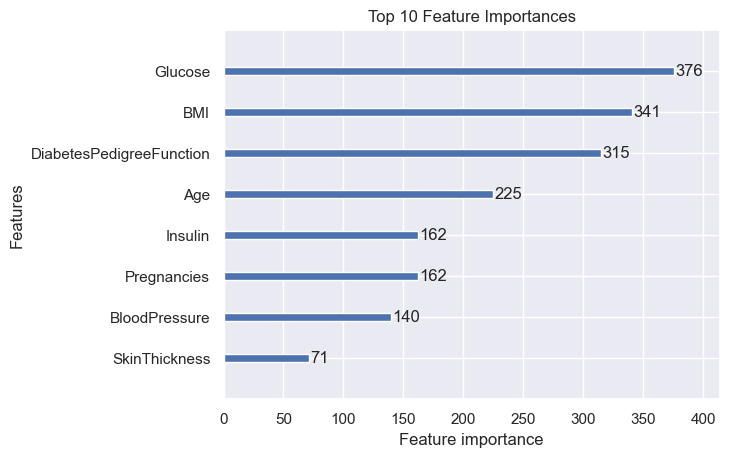

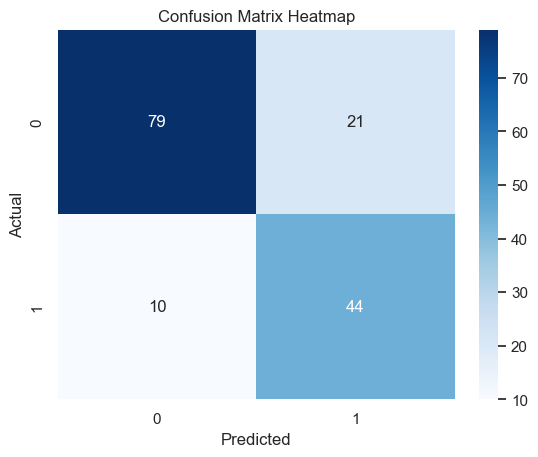

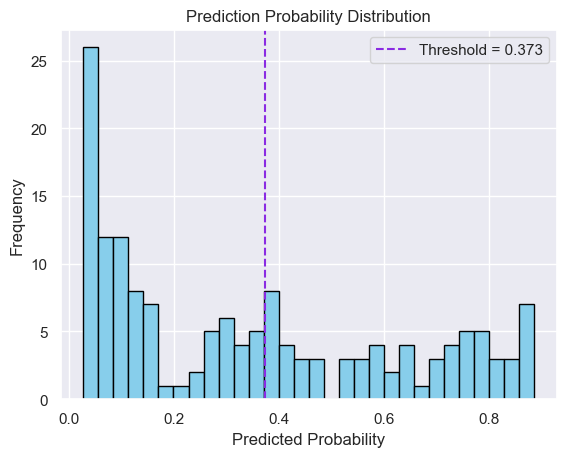

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve
)
from lightgbm import LGBMClassifier, plot_importance
import optuna

# Load dataset
data = pd.read_csv("diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    return np.max(f1_scores)

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_params
print("🎯 Best Parameters from Optuna:\n", best_params)

# Train final model
model = LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Optimal threshold from precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\n🔁 Optimal Threshold: {best_threshold:.3f}")

# Final predictions
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Evaluation
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"✅ Precision:      {precision_score(y_test, y_pred_final):.4f}")
print(f"✅ Recall:         {recall_score(y_test, y_pred_final):.4f}")
print(f"✅ F1 Score:       {f1_score(y_test, y_pred_final):.4f}")
print(f"✅ ROC-AUC Score:  {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final))

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in cv.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model_cv = LGBMClassifier(**best_params)
    model_cv.fit(X_tr, y_tr)
    preds = model_cv.predict_proba(X_val)[:, 1]
    preds_binary = (preds >= best_threshold).astype(int)
    cv_scores.append(accuracy_score(y_val, preds_binary))

print(f"\n📈 Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Noise sensitivity
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)
y_pred_noisy = model.predict_proba(X_test_noisy)[:, 1]
y_pred_noisy_binary = (y_pred_noisy >= best_threshold).astype(int)
print(f"\n⚠️ Accuracy with Noisy Test Data: {accuracy_score(y_test, y_pred_noisy_binary):.4f}")

# Feature importance
plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Prediction distribution
plt.hist(y_pred_proba, bins=30, color='skyblue', edgecolor='black')
plt.axvline(best_threshold, color='#8A2BE2', linestyle='--', label=f'Threshold = {best_threshold:.3f}')  # BlueViolet
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [35]:
import pickle

# After training your model
pickle.dump(model, open("model.pkl", "wb"))